**T5 Model**

In [1]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load T5 model and tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Reviews3000.csv"  # Replace with the actual file path
reviews_data = pd.read_csv(file_path)

# Extract the "Text" column
text_column = reviews_data["Text"] #Replace with cloumn contains Reviews

# Combine all reviews into a single string
combined_text = " ".join(text_column.dropna())


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the T5 model and tokenizer
model_name = "t5-small"  # You can use "t5-base" or "t5-large" for larger models
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Prepare the input text for summarization
input_text = f"summarize: {combined_text}"
inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

# Generate the summary
summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=50, length_penalty=2.0)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Summary of Reviews:", summary)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:657: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


Summary of Reviews: taffy is a light, pillowy citrus gelatin with nuts. it is cut into tiny squares and then liberally coated with powdered sugar. it is a tiny mouthful of heaven. it is a great treat for taffy lovers.


BART Model

In [ ]:
!pip install transformers pandas torch


In [ ]:
import pandas as pd

# Load the reviews dataset
file_path = "Reviews3000.csv"  # Replace with the actual path to your file
reviews_data = pd.read_csv(file_path)

# Extract the "Text" column
if "Text" in reviews_data.columns:
    reviews = reviews_data["Text"].dropna()  # Drop rows with missing values in "Text"
else:
    raise ValueError("The 'Text' column is not found in the dataset!")

print(f"Loaded {len(reviews)} reviews for processing.")


Loaded 3000 reviews for processing.


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load the BART model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Define a function to summarize a single review
def summarize_review(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=50, min_length=20, length_penalty=2.0)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Summarize the first few reviews for demonstration
summaries = []
for review in reviews[:10]:  # Replace 10 with the number of reviews to process
    try:
        summary = summarize_review(review)
        summaries.append(summary)
    except Exception as e:
        print(f"Error summarizing review: {e}")
        summaries.append("")

# Display some summaries
for i, summary in enumerate(summaries[:5]):
    print(f"Review {i+1} Summary: {summary}")


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Review 1 Summary: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. My Labrador is finicky and she appreciates this product better than most.
Review 2 Summary: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Review 3 Summary: Filberts is a light, pillowy citrus gelatin with nuts. Cut into tiny squares and then liberally coated with powdered sugar. Not too chewy, and very flavorful.
Review 4 Summary: If you are looking for the secret ingredient in Robitussin I believe I have found it. The flavor is very medicinal.
Review 5 Summary: Great taffy at a great price. There was a wide assortment of yummy taffies. Delivery was very quick.


In [ ]:
def generate_tags(summary):
    # Split the summary into words and pick unique, meaningful keywords
    tags = set(summary.split())  # Simple tokenization for demonstration
    return list(tags)[:5]  # Limit to the top 5 tags

# Generate tags for the summaries
tags_list = [generate_tags(summary) for summary in summaries]

# Display the summaries and their tags
for i in range(5):  # Display the first 5 results
    print(f"Summary {i+1}: {summaries[i]}")
    print(f"Tags {i+1}: {tags_list[i]}")


Summary 1: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. My Labrador is finicky and she appreciates this product better than most.
Tags 1: ['them', 'food', 'most.', 'My', 'Vitality']
Summary 2: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Tags 2: ['"Jumbo".', 'as', 'small', 'sure', 'vendor']
Summary 3: Filberts is a light, pillowy citrus gelatin with nuts. Cut into tiny squares and then liberally coated with powdered sugar. Not too chewy, and very flavorful.
Tags 3: ['liberally', 'coated', 'with', 'gelatin', 'very']
Summary 4: If you are looking for the secret ingredient in Robitussin I believe I have found it. The flavor is very medicinal.
Tags 4: ['it.', 'Robitussin', 'I', 'ingredient', 'very']
Summary 5: Great taffy at a great price. There was a wide assortment of yummy taffie

In [ ]:
# Create a DataFrame with summaries and tags
results = pd.DataFrame({
    "Original Review": reviews[:len(summaries)],
    "Summary": summaries,
    "Tags": [", ".join(tags) for tags in tags_list]
})

# Save to a CSV file
results.to_csv("summarized_reviews.csv", index=False)
print("Summarized reviews and tags saved to 'summarized_reviews.csv'.")


Summarized reviews and tags saved to 'summarized_reviews.csv'.


**Sentiment Analysis**


Using Fine Tune BERT


In [ ]:
!pip install transformers datasets torch scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from transformers import pipeline

# Load the dataset
file_path = "Reviews3000.csv"  # Path to your uploaded file
data = pd.read_csv(file_path)

# Check if the "Text" column exists
if "Text" not in data.columns:
    raise ValueError("The 'Text' column is not found in the dataset!")

# Extract reviews from the "Text" column
reviews = data["Text"].dropna()  # Drop rows with missing reviews

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Infer sentiments for each review
print("Processing sentiments for reviews...")
sentiments = []
for i, review in enumerate(reviews):
    try:
        sentiment = sentiment_analyzer(review[:512])  # Truncate to 512 tokens for BERT models
        sentiments.append(sentiment[0]["label"])
    except Exception as e:
        print(f"Error processing review {i}: {e}")
        sentiments.append("Error")

# Add sentiments as a new column in the dataset
data = data.loc[reviews.index]  # Ensure we match the non-empty rows
data["Sentiment"] = sentiments

# Save the updated dataset
output_path = "Reviews_with_sentiments.csv"
data.to_csv(output_path, index=False)
print(f"Dataset with sentiments saved to {output_path}.")



Processing sentiments for reviews...
Dataset with sentiments saved to Reviews_with_sentiments.csv.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "Reviews_with_sentiments.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Assume the dataset has 'Text' and 'Sentiment' columns
if "Text" in data.columns and "Sentiment" in data.columns:
    reviews = data["Text"].dropna()
    labels = data["Sentiment"].dropna()
else:
    raise ValueError("The dataset must contain 'Text' and 'Sentiment' columns.")

# Encode labels (convert to numerical format)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    reviews, labels_encoded, test_size=0.2, random_state=42
)

print(f"Training size: {len(train_texts)}, Validation size: {len(val_texts)}")


Training size: 2400, Validation size: 600


In [ ]:
from transformers import BertTokenizer

# Load BERT tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

# Tokenize the text
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512, return_tensors="pt")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


In [ ]:
from transformers import BertForSequenceClassification

# Load pre-trained BERT with classification head
num_labels = len(label_encoder.classes_)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader
from transformers import AdamW

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed.")


In [ ]:
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader # Importing DataLoader
import torch

model.eval()
predictions, true_labels = [], []

# Creating the val_loader here
val_loader = DataLoader(val_dataset, batch_size=16)

# Defining the device here
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)  # Move the model to the device

with torch.no_grad():
    for batch in val_loader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, axis=1).cpu().numpy())
        true_labels.extend(batch["labels"].cpu().numpy())

print(classification_report(true_labels, predictions, target_names=label_encoder.classes_))


<ipython-input-6-dd1ef07c6cd5>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


              precision    recall  f1-score   support

    NEGATIVE       0.32      0.98      0.48       193
    POSITIVE       0.50      0.01      0.01       407

    accuracy                           0.32       600
   macro avg       0.41      0.50      0.25       600
weighted avg       0.44      0.32      0.17       600



In [ ]:
model.save_pretrained("./fine_tuned_bert_sentiment")
tokenizer.save_pretrained("./fine_tuned_bert_sentiment")


('./fine_tuned_bert_sentiment/tokenizer_config.json',
 './fine_tuned_bert_sentiment/special_tokens_map.json',
 './fine_tuned_bert_sentiment/vocab.txt',
 './fine_tuned_bert_sentiment/added_tokens.json')

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned model
model = BertForSequenceClassification.from_pretrained("./fine_tuned_bert_sentiment")
tokenizer = BertTokenizer.from_pretrained("./fine_tuned_bert_sentiment")

# Inference
review = "This product is amazing and I love it!"
inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=512)
outputs = model(**inputs)
predicted_label = torch.argmax(outputs.logits).item()
print(f"Predicted Sentiment: {label_encoder.inverse_transform([predicted_label])[0]}")


Predicted Sentiment: NEGATIVE


<ipython-input-17-313f58e69765>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


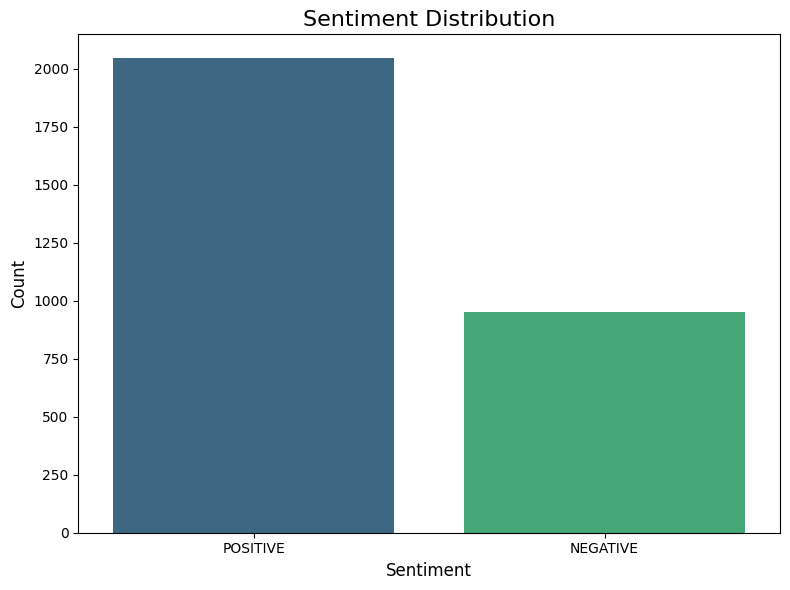

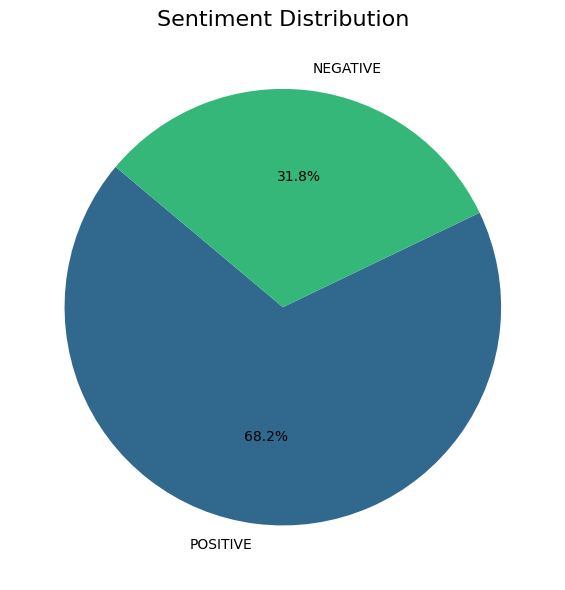

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with sentiments
file_path = "Reviews_with_sentiments.csv"  # Path to the updated dataset
data = pd.read_csv(file_path)

# Count the sentiment distribution
sentiment_counts = data["Sentiment"].value_counts()

# Bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("viridis", len(sentiment_counts)),
)
plt.title("Sentiment Distribution", fontsize=16)
plt.tight_layout()
plt.show()


**Generating Tags**


In [ ]:
!pip install rake-nltk pandas


In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Generating tags using RAKE(Rapid Automatic Keyword Extraction) for extracting keywords as tags.


In [ ]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

import pandas as pd
from rake_nltk import Rake

# Load dataset
file_path = "Reviews_with_sentiments.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Initialize RAKE
rake = Rake()

# Extract keywords (tags) from reviews
tags = []
for review in data["Text"].dropna():  # Process non-empty reviews
    rake.extract_keywords_from_text(review)
    # Select the top 3 keywords/phrases as tags
    tags.append(rake.get_ranked_phrases()[:3])

# Add the tags to the dataset
data["Tags"] = tags

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
output_path = "Reviews_with_tags.csv"
data.to_csv(output_path, index=False)
print(f"Dataset with tags saved to {output_path}.")


Dataset with tags saved to Reviews_with_tags.csv.


In [ ]:
# Function to filter reviews by a tag
def filter_reviews_by_tag(tag, data):
    filtered_reviews = data[data["Tags"].apply(lambda tags: tag in tags if isinstance(tags, list) else False)]
    return filtered_reviews[["Text", "Sentiment", "Tags"]]

# Example usage
example_tag = "battery life"  # Replace with a desired tag
filtered_reviews = filter_reviews_by_tag(example_tag, data)

# Display filtered reviews
print(f"Reviews tagged with '{example_tag}':")
print(filtered_reviews.head())


Reviews tagged with 'battery life':
Empty DataFrame
Columns: [Text, Sentiment, Tags]
Index: []


**Generating Tags**
using T5

In [ ]:
from transformers import pipeline

# Initialize T5 for summarization/tag generation
tag_generator = pipeline("summarization", model="t5-small")

# Generate tags for each review
tags = []
for review in data["Text"].dropna():
    summary = tag_generator(review, max_length=10, min_length=5, do_sample=False)
    tags.append(summary[0]["summary_text"])

data["Tags"] = tags
print(data.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (637 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract top keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data["Text"].dropna())

# Get top terms for each review
tags = []
feature_names = vectorizer.get_feature_names_out()
for row in X:
    indices = row.indices
    top_keywords = [feature_names[i] for i in indices[:3]]
    tags.append(top_keywords)

data["Tags"] = tags
print(data.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


**Using K Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data["Text"].dropna())

# Perform clustering
n_clusters = 5  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters as tags
data["Tags"] = clusters
print(data.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
